<a href="https://colab.research.google.com/github/DJCordhose/ai/blob/master/notebooks/2019_tf/embeddings-viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Latent Neural Spaces

https://www.sfdatainstitute.org/

In [1]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

1.13.0-rc1


### Challenge: You have a couple of airports and want to bring them into a numerical representation to enable processing with neural networks. How do you do that?

In [0]:
airports = {
 'HAM': "germany europe regional",
 'TXL': "germany europe regional",
 'FRA': "germany europe hub",
 'MUC': "germany europe hub",
 'CPH': "denmark capital scandinavia europe hub",
 'ARN': "sweden capital scandinavia europe regional",
 'BGO': "norway scandinavia europe regional",
 'OSL': "norway capital scandinavia europe regional",
 'LHR': "gb capital europe hub",
 'CDG': "france capital europe hub",
 'SFO': "usa california regional",
 'AUS': "usa texas regional",
 'EWR': "usa new_jersey hub",
 'JFK': "usa new_york hub",
 'ATL': "usa georgia hub",
 'STL': "usa missouri regional"
}

### Encode airport to number (simple)

In [0]:
airport_names = list(airports.keys())
airport_numbers = list(range(0, len(airports)))
airport_to_number = dict(zip(airport_names, airport_numbers))
number_to_airport = dict(zip(airport_numbers, airport_names))

### Encode Texts in multi-hot / tfidf

In [0]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [0]:
texts = list(airports.values())
tokenizer.fit_on_texts(texts)

In [0]:
# mode: one of "binary", "count", "tfidf", "freq".
# description_matrix = tokenizer.texts_to_matrix(texts, mode='tfidf')
description_matrix = tokenizer.texts_to_matrix(texts, mode='freq')

In [7]:
aiport_count, word_count = description_matrix.shape
dictionary_size = word_count
aiport_count, word_count

(16, 20)

In [0]:
x = airport_numbers
Y = description_matrix

## Let's try 2d embeddings

CPU times: user 14.3 s, sys: 587 ms, total: 14.9 s
Wall time: 11.1 s
CPU times: user 14.5 s, sys: 596 ms, total: 15.1 s
Wall time: 11.3 s


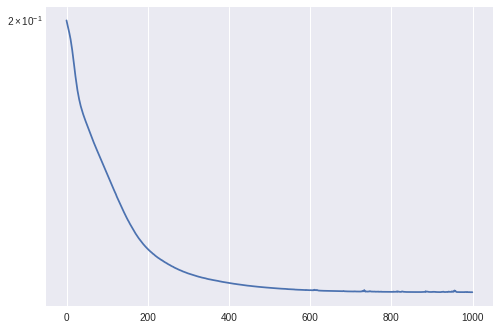

In [9]:
%%time

import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, GlobalAveragePooling1D, Dense, LSTM, GRU, SimpleRNN, Bidirectional, Embedding
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.initializers import glorot_normal
seed = 3

input_dim = len(airports)
embedding_dim = 2

model = Sequential()

model.add(Embedding(name='embedding',
                    input_dim=input_dim, 
                    output_dim=embedding_dim, 
                    input_length=1,
                    embeddings_initializer=glorot_normal(seed=seed)))

model.add(GlobalAveragePooling1D())

model.add(Dense(units=50, activation='relu', bias_initializer='zeros', kernel_initializer=glorot_normal(seed=seed)))

model.add(Dense(units=dictionary_size, name='output', activation='softmax', bias_initializer='zeros', kernel_initializer=glorot_normal(seed=seed)))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

EPOCHS=1000
BATCH_SIZE=2

%time history = model.fit(x, Y, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)


plt.yscale('log')
plt.plot(history.history['loss'])

In [10]:
loss, accuracy = model.evaluate(x, Y)
loss, accuracy

16/16 [==============================] - 0s 2ms/sample - loss: 0.1064 - acc: 0.8156


(0.10640935599803925, 0.815625)

HAM (0.73163867, -0.98612255)
TXL (0.63164884, -0.89461863)
FRA (-0.25367296, -1.2728841)
MUC (-0.26456648, -1.0977981)
CPH (-0.338904, 1.8887835)
ARN (-0.0012261684, 0.017091)
BGO (0.4355159, 1.2512712)
OSL (0.039217193, 0.51750624)
LHR (-0.6854905, 0.57431287)
CDG (-1.1767806, 1.6796381)
SFO (1.4833689, -0.41202626)
AUS (1.0745472, 0.27078557)
EWR (-1.640901, -0.94441164)
JFK (-1.081617, -0.23975974)
ATL (-1.9070147, 0.2622249)
STL (1.3671476, 1.2792312)


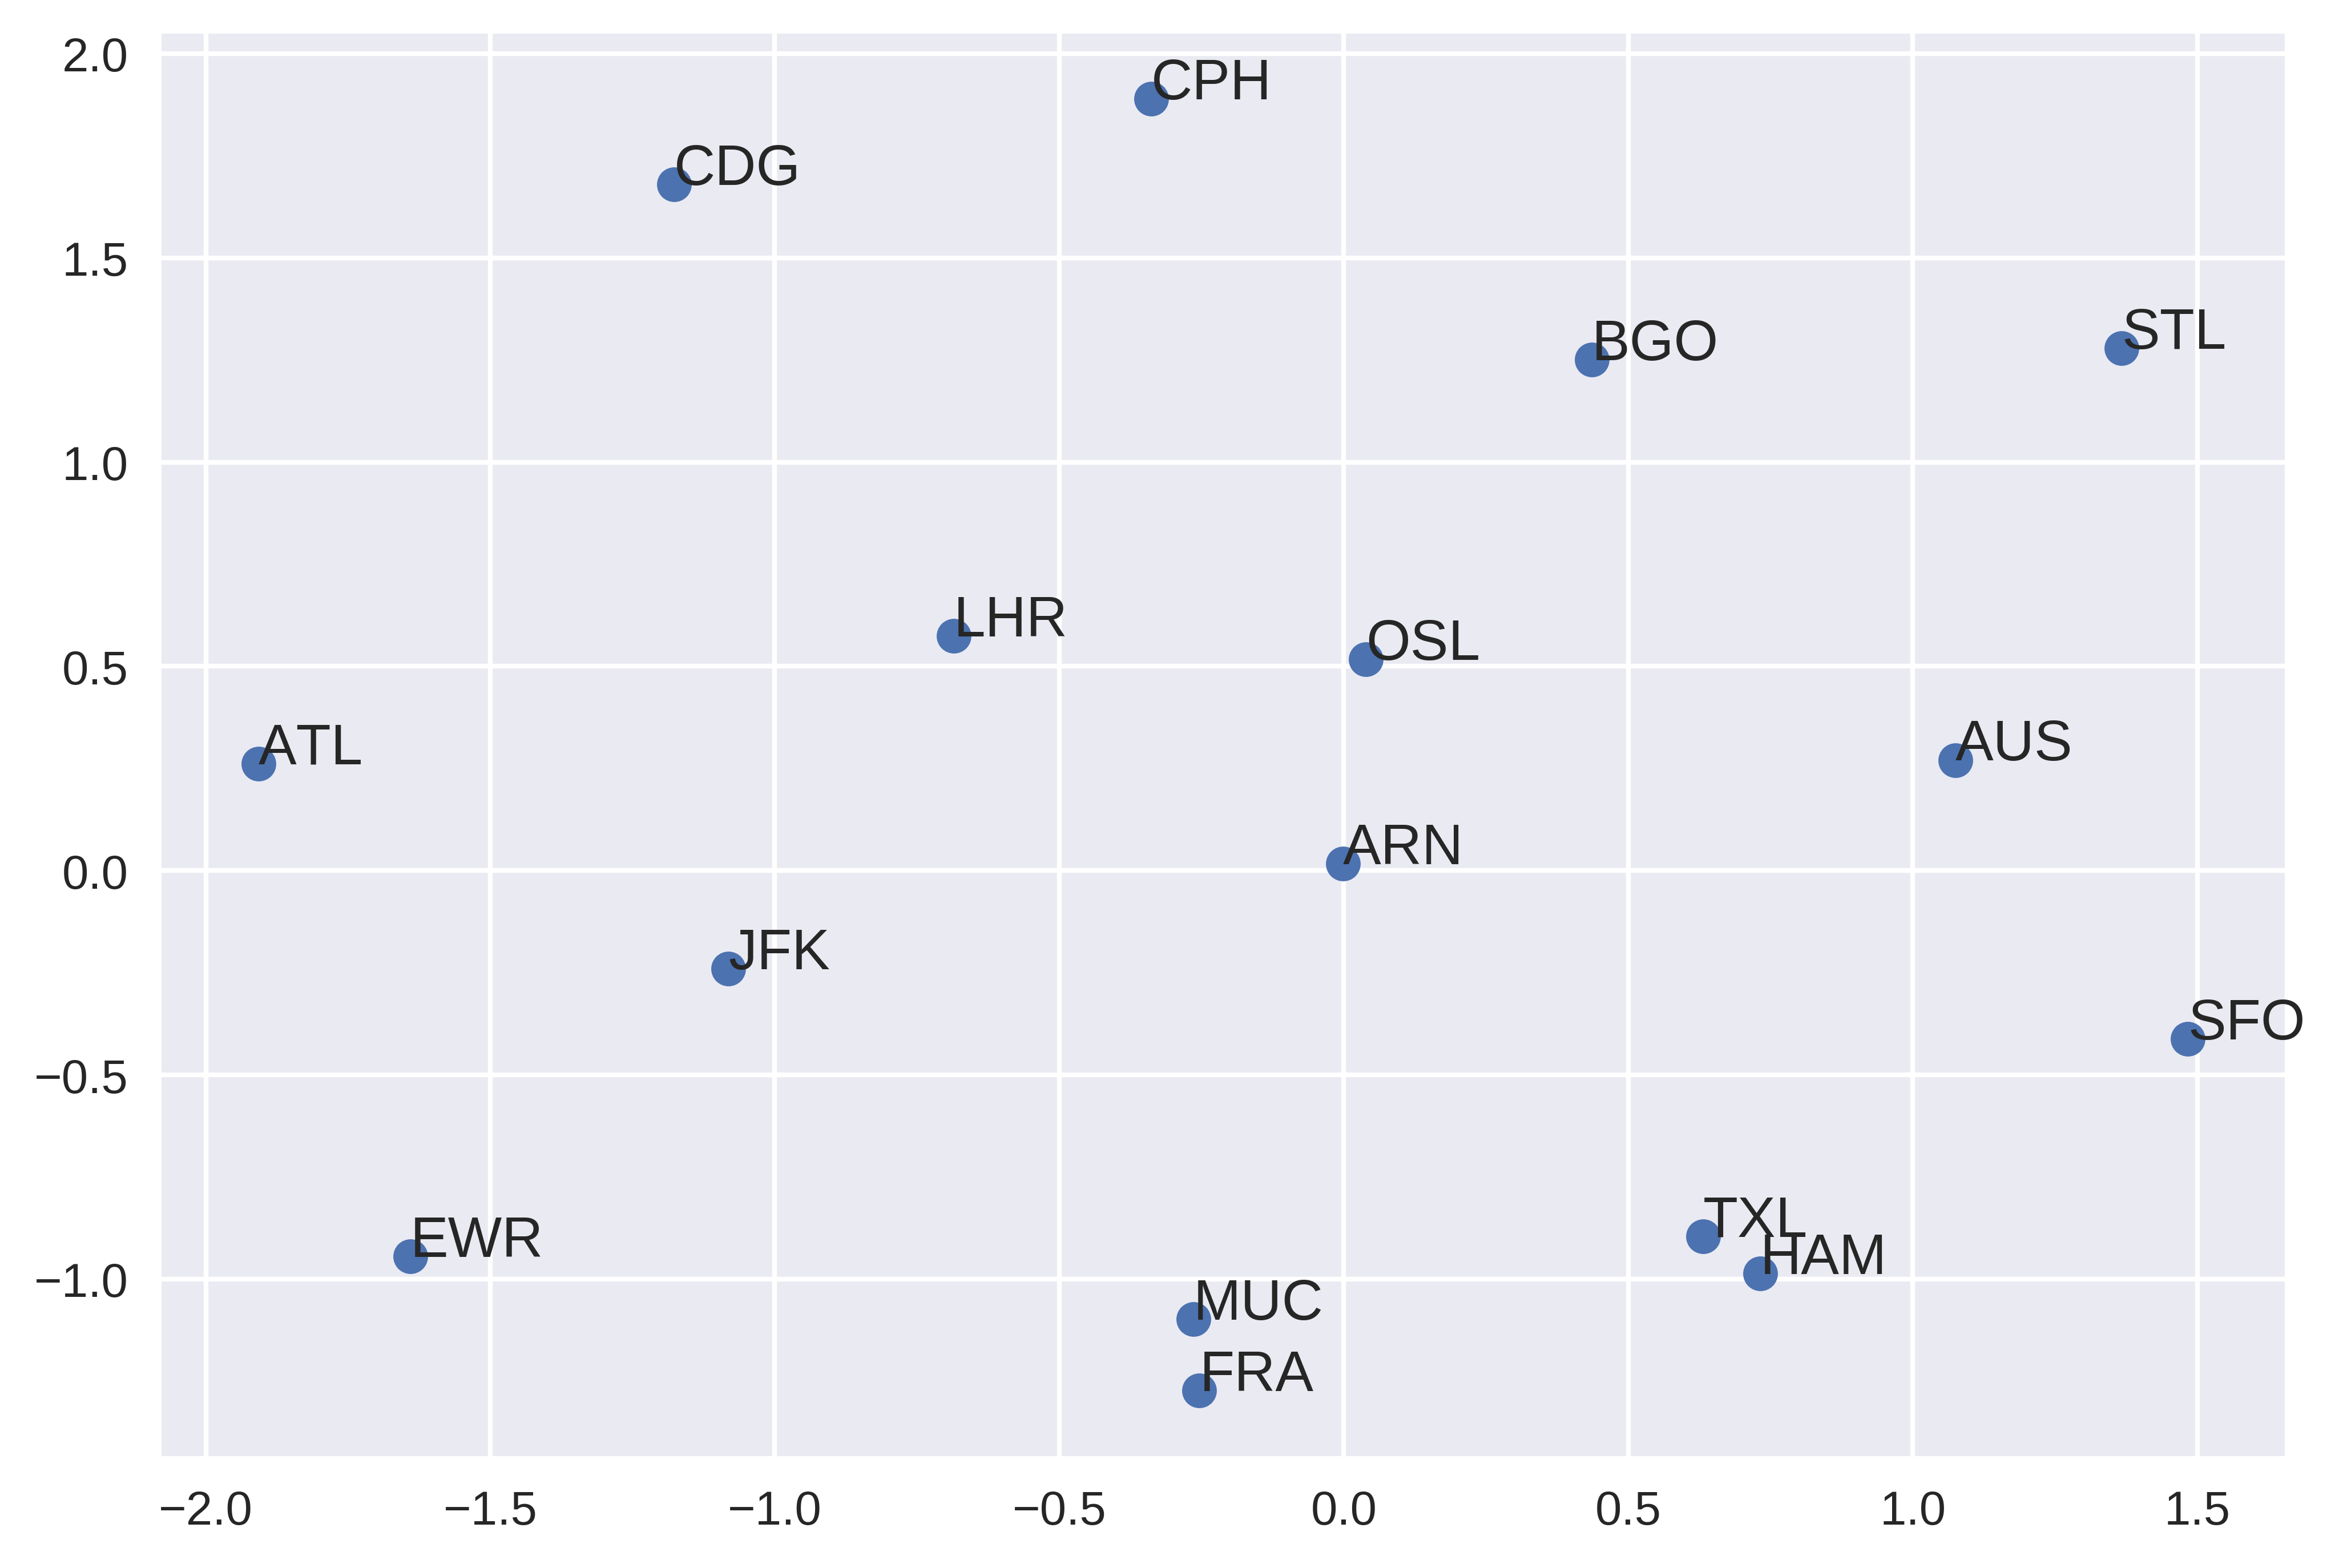

In [11]:
embedding_layer = model.get_layer('embedding')
embedding_model = Model(inputs=model.input, outputs=embedding_layer.output)
embeddings_2d = embedding_model.predict(airport_numbers).reshape(-1, 2)

plt.figure(dpi=600)
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
for name, x_pos, y_pos in zip(airport_names, embeddings_2d[:, 0], embeddings_2d[:, 1]):
  print(name, (x_pos, y_pos))
  plt.annotate(name, (x_pos, y_pos))